# EXPLORATORY DATA ANALYSIS ON GLOBAL TERRORISM DATABASE

In [1]:
#importing all necessary python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings 
warnings.filterwarnings("ignore")

In [2]:
#The original data is stored in dataframe df1
df1=pd.read_csv('GTDO.csv')

In [3]:
df1.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,1.970000e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,0,0,1,1,NaN
3,1.970000e+11,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,0,0,1,1,NaN
4,1.970000e+11,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,0,0,1,1,NaN


# Data Preprocessing

Many of the columns have null values more than 60%. We have focussed on those columns which will be able to provide meaningful insights in our Exploratory Data Analysis.

In [4]:
#Extracting only the columns which we will use in our EDA analysis and forming a new dataframe df
df=df1[['iyear', 'imonth', 'iday', 'country_txt', 'region_txt',
       'provstate', 'city', 'crit1', 'crit2', 'crit3',
       'suicide', 'attacktype1_txt', 'targtype1_txt','gname',
        'weaptype1_txt', 'nkill', 'nkillter',
       'nwound','nwoundte','latitude','longitude','nhostkid','nhours','ndays','ransomamt','nreleased']]

* The columns included in our analysis are described below in brief: -

* 1.iyear:
  This field contains the year in which the incident occurred. 

* 2.imonth
  This field contains the number of the month in which the incident occurred.

* 3.iday
  This field contains the numeric day of the month on which the incident occurred. 

* 4.country_txt:
  This field contains the name of the countries.

* 5.region_txt
  It tells us about the regions or parts of different countries.

* 6.provstate
  It tells us about the states of the countries.

* 7.Crit1, Crit2, Crit3
  Crit1
 	The act must be aimed at attaining a political, economic, religious, or social goal.
  Crit2
    There must be evidence of an intention to coerce, intimidate, or convey some other message to a larger audience (or   
    audiences) than the immediate victims.
  Crit3
    The action must be outside the context of legitimate warfare activities.


* 8.attacktype1_txt
    It informs us about the type of attacks i.e kidnapping, explosion etc.

* 9.targtype1_txt
    It informs us about the targets like Private, Governments, Journa-list etc. 

* 10.gname
    It describes the name of the terrorist groups involved in the attack.

* 11.weaptype1_txt
    It describes the type of weapons used by the groups

* 12.nkill
    It describes the number of people killed

* 13.nwound
    It describes the number of people wounded 


Some of the columns have been renamed for the ease of our analysis.



In [5]:
df=df.rename(columns={'iyear':'year','imonth':'month','iday':'day','country_txt':'country_name','region_txt':'region_name',\
                     'provstate':'state','attacktype1_txt':"attack_type",'targtype1_txt':'target_type',\
                     'gname':'terr_group_name','weaptype1_txt':'weapon_type'})

In [6]:
df.head(2)

,year,month,day,country_name,region_name,state,city,crit1,crit2,crit3,...,nkillter,nwound,nwoundte,latitude,longitude,nhostkid,nhours,ndays,ransomamt,nreleased
0,1970,7,2,Dominican Republic,Central America & Caribbean,National,Santo Domingo,1,1,1,...,NaN,0.0,NaN,18.456792,-69.951164,NaN,NaN,NaN,NaN,NaN
1,1970,0,0,Mexico,North America,Federal,Mexico city,1,1,1,...,NaN,0.0,NaN,19.371887,0.086624,1.0,NaN,NaN,800000.0,NaN


In [7]:
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
#         mz_table.to_excel('D:/sampledata/missing_and_zero_values.xlsx', freeze_panes=(1,0), index = False)
        return mz_table

#missing_zero_values_table(df)
#pd.set_option("max_rows", None)
missing_zero_values_table(df)[missing_zero_values_table(df)['% of Total Values']>70.0]

Your selected dataframe has 26 columns and 201183 Rows.
There are 12 columns that have missing values.
Your selected dataframe has 26 columns and 201183 Rows.
There are 12 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
ransomamt,648,199698,99.3,200346,99.6,float64
nhours,4028,196482,97.7,200510,99.7,float64
ndays,5575,191503,95.2,197078,98.0,float64
nreleased,7318,188588,93.7,195906,97.4,float64
nhostkid,1428,185420,92.2,186848,92.9,float64


In [8]:
#The null values are put as 0 and the columns are converted to integer 
df.nkill=df.nkill.fillna(0).astype('int')
df.nwound=df.nwound.fillna(0).astype('int')
df.nkillter=df.nkillter.fillna(0).astype('int')
df.nwoundte=df.nwoundte.fillna(0).astype('int')
df.nhostkid=df.nhostkid.fillna(0).astype('int')
df.nhours=df.nhours.fillna(0).astype('int')
df.ndays=df.ndays.fillna(0).astype('int')
df.ransomamt=df.ransomamt.fillna(0).astype('int')
df.nreleased=df.nreleased.fillna(0).astype('int')

In [9]:
df[['nkill','nwound','nkillter','nwoundte','nhostkid','nhours','ndays','ransomamt','nreleased']].describe()

,nkill,nwound,nkillter,nwoundte,nhostkid,nhours,ndays,ransomamt,nreleased
count,201183.000000,201183.000000,201183.000000,201183.00000,201183.000000,201183.000000,201183.000000,2.011830e+05,201183.000000
mean,2.267831,2.831964,0.355746,0.08198,0.985545,0.017994,0.940079,2.112757e+04,0.278060
std,10.927856,39.728346,3.476231,1.25035,52.099804,0.498084,23.527725,2.478413e+06,10.018089
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
50%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
75%,2.000000,2.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
max,1570.000000,10878.000000,500.000000,200.00000,17000.000000,72.000000,2676.000000,1.000000e+09,2958.000000


The above table shows the descriptive statistics for all the numeric columns. we can see that there is high variation among the datapoints in each feature which is denoted by high standard deviation. The median value is 0 for all of these features. We have replaced the missing values by 0. 

In [10]:
#num dataframe stores the numeric features after taking the sum or averages of the respective features
#year-wise. 
def num(df):
    num=pd.DataFrame()
    num['nkill']=(df[["year","nkill"]].groupby("year").aggregate(np.sum)).nkill.round(decimals=2).to_list()
    num['nwound']=(df[["year","nwound"]].groupby("year").aggregate(np.sum)).nwound.round(decimals=2).to_list()
    num['nkillter']=(df[["year","nkillter"]].groupby("year").aggregate(np.sum)).nkillter.round(decimals=2).to_list()
    num['nwoundte']=(df[["year","nwoundte"]].groupby("year").aggregate(np.sum)).nwoundte.round(decimals=2).to_list()
    num['nhostkid']=(df[["year","nhostkid"]].groupby("year").aggregate(np.sum)).nhostkid.round(decimals=2).to_list()
    num['nhours']=(df[["year","nhours"]].groupby("year").aggregate(np.average)).nhours.round(decimals=2).to_list()
    num['ndays']=(df[["year","ndays"]].groupby("year").aggregate(np.average)).ndays.round(decimals=2).to_list()
    num['ransomamt']=(df[["year","ransomamt"]].groupby("year").aggregate(np.average)).ransomamt.round(decimals=2).to_list()
    num['nreleased']=(df[["year","nreleased"]].groupby("year").aggregate(np.sum)).nreleased.round(decimals=2).to_list()
    num['suicide']=(df[["year","suicide"]].groupby("year").aggregate(np.sum)).suicide.round(decimals=2).to_list()
    num.index=df.year.drop_duplicates()
    return num

In [11]:
num=num(df)
num

,nkill,nwound,nkillter,nwoundte,nhostkid,nhours,ndays,ransomamt,nreleased,suicide
year,,,,,,,,,,
1970,174,212,15,1,954,0.03,0.62,2898.62,645,0
1971,173,82,4,0,60,0.04,0.37,1443.74,45,0
1972,566,409,18,2,302,0.03,0.05,32095.07,302,0
1973,370,495,21,1,363,0.04,1.82,78885.84,180,0
1974,539,865,22,7,277,0.03,0.60,125681.58,57,0
1975,617,617,106,4,227,0.03,1.47,8459.86,55,0
1976,674,756,16,3,667,0.04,2.15,36254.60,155,0
1977,457,521,20,3,1177,0.00,0.75,57865.20,323,0
1978,1459,1600,34,6,2001,0.02,0.50,744494.76,289,0


Note: The grouping of the numerical attributes was also possible to be done country wise, but since here, we are considering the global scenario of terrorism, we are more interested to know the distributions of data year-wise which will give us an idea of the global terrorism situation across the years in all the countries.

nkill,nwound,nkillter,nwoundte and nreleased are showing the sum of these attributes across each year. Sum has been considered to understand the total number of persons who got affected by all the terrorist activities throughout the globe each year. 

The other attributes that is, nhours, ndays, ransomamt attributes of num display the average number of hours and days a person kidnapped in a terrorist activity was detained per year and also ransomamt refers to the average amount of oney demanded by the terrorists.

In [12]:
num.head(3)

,nkill,nwound,nkillter,nwoundte,nhostkid,nhours,ndays,ransomamt,nreleased,suicide
year,,,,,,,,,,
1970,174,212,15,1,954,0.03,0.62,2898.62,645,0
1971,173,82,4,0,60,0.04,0.37,1443.74,45,0
1972,566,409,18,2,302,0.03,0.05,32095.07,302,0


In [13]:
num.describe()

,nkill,nwound,nkillter,nwoundte,nhostkid,nhours,ndays,ransomamt,nreleased,suicide
count,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000
mean,9311.204082,11627.408163,1460.612245,336.591837,4046.428571,0.022041,0.826735,37251.243673,1141.653061,148.346939
std,9866.017997,11511.861157,3092.165603,778.902725,6036.225666,0.017909,0.605611,107576.158046,1404.460091,258.272833
min,173.000000,82.000000,4.000000,0.000000,60.000000,0.000000,0.020000,634.390000,45.000000,0.000000
25%,4391.000000,3637.000000,36.000000,4.000000,1084.000000,0.010000,0.370000,3460.810000,322.000000,1.000000
50%,7036.000000,7384.000000,206.000000,16.000000,1934.000000,0.020000,0.620000,10933.010000,645.000000,15.000000
75%,9444.000000,15953.000000,666.000000,109.000000,3944.000000,0.030000,1.180000,32095.070000,1228.000000,184.000000
max,44524.000000,44204.000000,11817.000000,2970.000000,34295.000000,0.070000,2.250000,744494.760000,6807.000000,985.000000


The above table shows the descriptive statistics of the num data table.




Another column named 'Cause' is formed where it stores the criteria corresponding to each attack. The 'crit1','crit2','crit3' columns are only having values 1's or 0's depending on whether the criteria is relevant for the attack or not. Hence, this new column is a categorical column which stores the corresponding criteria types for each attack.

In [14]:
df['Cause']=0
for i in range(df.shape[0]):
    if df.crit1[i]==1 and df.crit2[i]!=1 and df.crit3[i]!=1:
        df['Cause'][i]='crit1' 
    elif df.crit2[i]==1 and df.crit1[i]!=1 and df.crit3[i]!=1:
        df["Cause"][i]='crit2'
    elif df.crit3[i]==1 and df.crit1[i]!=1 and df.crit2[i]!=1:
        df['Cause'][i]='crit3'
    elif df.crit1[i]==1 and df.crit2[i]==1 and df.crit3[i]!=1:
        df['Cause'][i]='crit1,crit2'
    elif df.crit2[i]==1 and df.crit3[i]==1 and df.crit1[i]!=1:
        df['Cause'][i]='crit2,crit3'
    elif df.crit1[i]==1 and df.crit3[i]==1 and df.crit2[i]!=1:
        df['Cause'][i]='crit1,crit3'
    elif df.crit1[i]==1 and df.crit2[i]==1 and df.crit3[i]==1:
        df['Cause'][i]='crit1,crit2,crit3'

In [15]:
df.head()

,year,month,day,country_name,region_name,state,city,crit1,crit2,crit3,...,nwound,nwoundte,latitude,longitude,nhostkid,nhours,ndays,ransomamt,nreleased,Cause
0,1970,7,2,Dominican Republic,Central America & Caribbean,National,Santo Domingo,1,1,1,...,0,0,18.456792,-69.951164,0,0,0,0,0,"crit1,crit2,crit3"
1,1970,0,0,Mexico,North America,Federal,Mexico city,1,1,1,...,0,0,19.371887,0.086624,1,0,0,800000,0,"crit1,crit2,crit3"
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,1,1,1,...,0,0,15.478598,120.599741,0,0,0,0,0,"crit1,crit2,crit3"
3,1970,1,0,Greece,Western Europe,Attica,Athens,1,1,1,...,0,0,37.997490,23.762728,0,0,0,0,0,"crit1,crit2,crit3"
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,1,1,1,...,0,0,33.580412,130.396361,0,0,0,0,0,"crit1,crit2,crit3"


# EDA Part 1: On Global Database (considering all the countries)

The variables below stores the count of attacks by year, month and day.

In [16]:
attacks_by_year=df.year.value_counts().sort_index()
s=df.month.value_counts().drop(0)
attacks_by_month=df.month.value_counts().drop(0).sort_index()/sum(s)

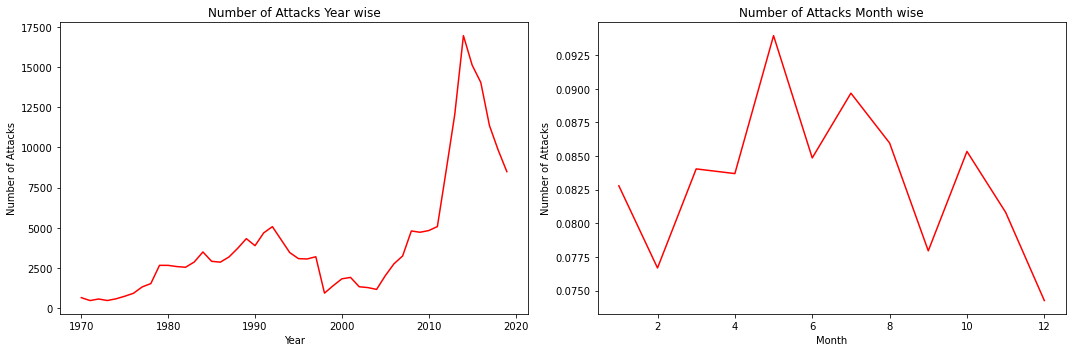

In [17]:
f,ax=plt.subplots(1,2,figsize=(15,5))

ax[0].plot(attacks_by_year,color='r')
ax[0].set_title("Number of Attacks Year wise")
ax[0].set_xlabel("Year")
ax[0].set_ylabel("Number of Attacks")


ax[1].plot(attacks_by_month,color='r')
ax[1].set_title("Number of Attacks Month wise")
ax[1].set_xlabel("Month")
ax[1].set_ylabel("Number of Attacks")


f.tight_layout()


The above plot shows that the number of global terrorist attacks increased gradually till around the year 1990 and then decreased slightly with minimum in the year of 1998. Then the count increased sharply after 2010 to a great extent and reached its peak in 2014 and decreased sharply after that. The data is available from 1970-2019. 

Month wise average number of attacks is fluctuating a lot across the months. The count has become maximum at month 5 (May).

In [18]:
#Merged data frame is formed with year wise number of attacks, fatalities and injuries.
injuries_by_year = df[["year","nwound"]].groupby("year").aggregate(np.sum)
nkill_by_year=df[['year','nkill']].groupby('year').aggregate(np.sum)

attacks_by_year=pd.DataFrame(attacks_by_year)
attacks_by_year.columns=['Attacks']
attacks_by_year.index.rename('year',inplace=True)

t1=pd.merge(attacks_by_year,injuries_by_year,on='year')
t2=pd.merge(t1,nkill_by_year,on='year')
t2.head()

,Attacks,nwound,nkill
year,,,
1970,651,212,174
1971,471,82,173
1972,568,409,566
1973,473,495,370
1974,581,865,539


In [19]:
#Descriptive Statistics on Number of Attacks, wounds and Fatalities
t2.describe()

,Attacks,nwound,nkill
count,49.000000,49.000000,49.000000
mean,4105.775510,11627.408163,9311.204082
std,3959.746479,11511.861157,9866.017997
min,471.000000,82.000000,173.000000
25%,1396.000000,3637.000000,4391.000000
50%,2914.000000,7384.000000,7036.000000
75%,4722.000000,15953.000000,9444.000000
max,16959.000000,44204.000000,44524.000000


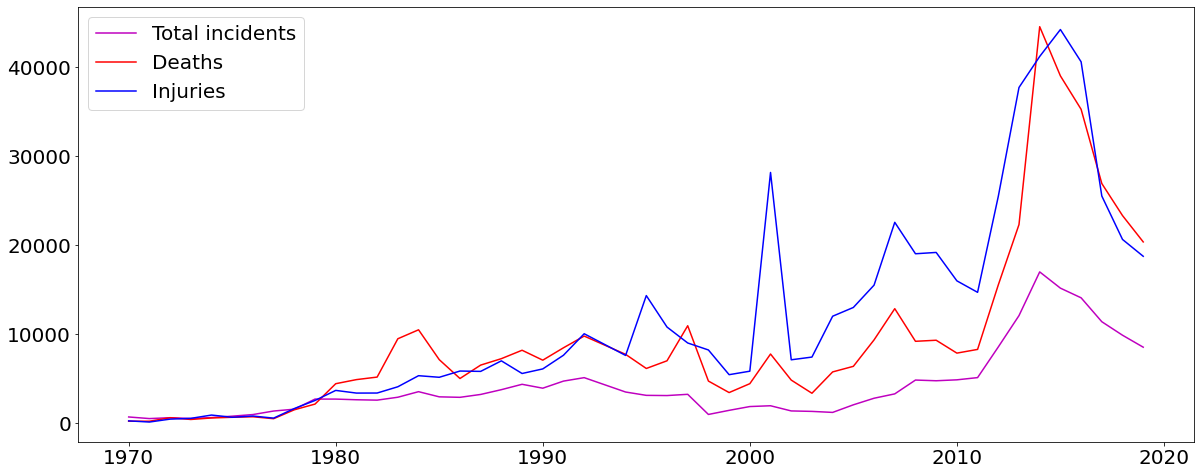

In [20]:
f=plt.subplots(figsize=(20,8))
plt.plot(t2.index,t2['Attacks'],color='m',label="Total incidents")
plt.plot(t2.index,t2['nkill'],color = 'r',label='Deaths')
plt.plot(t2.index,t2['nwound'],color = 'b',label='Injuries')
plt.legend(prop={"size":20})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

The above plot shows the global terrorism data on total number of attacks, injuries and fatalities yearwise. The trend is increasing over the years with fluctuations for all the three line plots.Throughout, we can see that number of injuries and deaths have been quite high except the initial years; for yearwise totals; where number of injuries have been maximum across most of the years. Whenever, any global terrorist activity occurs, number of deaths and injuries are huge.

The major observations that are made:

1. In 1984,the total number of deaths increased to a great extent as compared to number of injuries and number of incidents.


2. For the year 1995, number of injuries and for 1997, number of deaths have taken a sudden increase.


3. For the years 2001,2007,2013-2016, the counts of injuries and deaths have been significantly high.



Text(0.5, 1.0, 'Injuries each year distribution of terrorists')

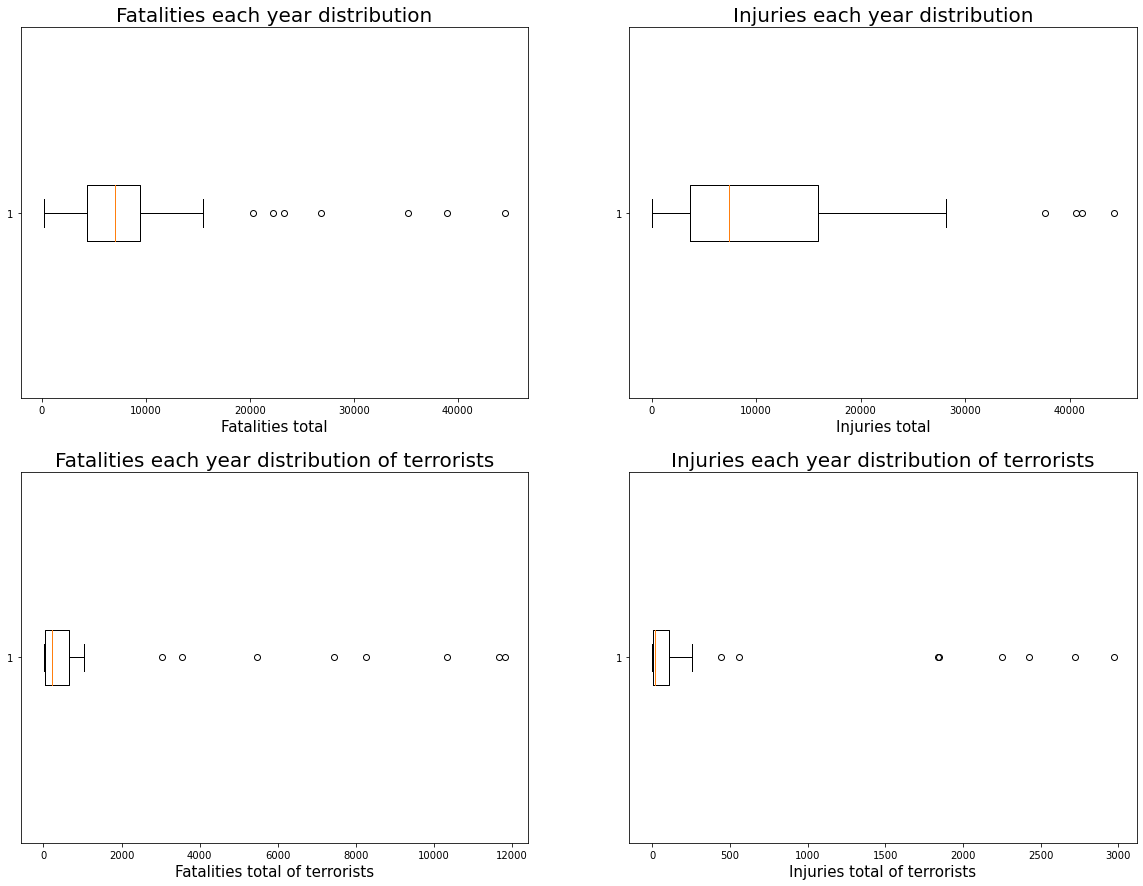

In [21]:
f,ax=plt.subplots(2,2,figsize=(20,15))
ax[0,0].boxplot(num.nkill,vert=False)
ax[0,0].set_xlabel("Fatalities total",fontdict={'fontsize': 15})
ax[0,0].set_title('Fatalities each year distribution',fontdict={'fontsize': 20})
ax[0,1].boxplot(num.nwound,vert=False)
ax[0,1].set_xlabel("Injuries total",fontdict={'fontsize': 15})
ax[0,1].set_title('Injuries each year distribution',fontdict={'fontsize': 20})
ax[1,0].boxplot(num.nkillter,vert=False)
ax[1,0].set_xlabel("Fatalities total of terrorists",fontdict={'fontsize': 15})
ax[1,0].set_title('Fatalities each year distribution of terrorists',fontdict={'fontsize': 20})
ax[1,1].boxplot(num.nwoundte,vert=False)
ax[1,1].set_xlabel("Injuries total of terrorists",fontdict={'fontsize': 15})
ax[1,1].set_title('Injuries each year distribution of terrorists',fontdict={'fontsize': 20})

Text(0.5, 1.0, 'Released each year distribution')

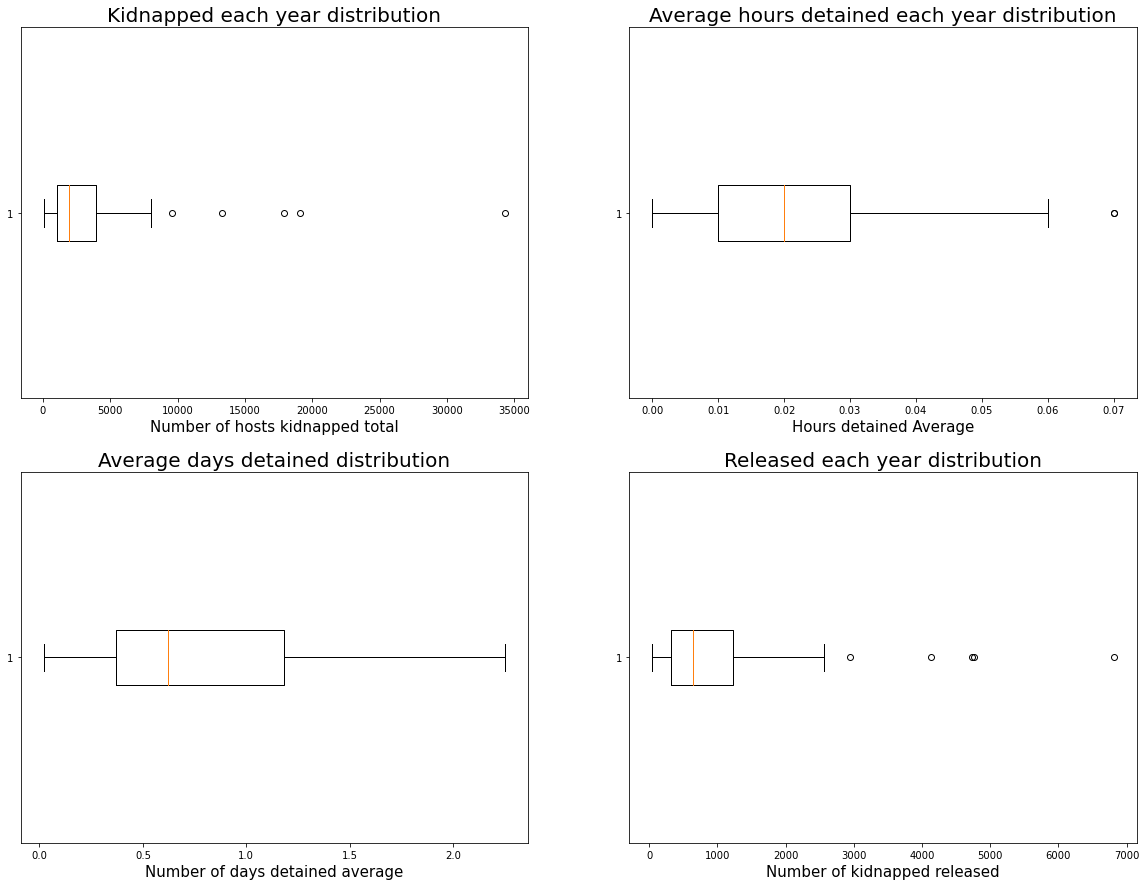

In [22]:
f,ax=plt.subplots(2,2,figsize=(20,15))
ax[0,0].boxplot(num.nhostkid,vert=False)
ax[0,0].set_xlabel("Number of hosts kidnapped total",fontdict={'fontsize': 15})
ax[0,0].set_title('Kidnapped each year distribution',fontdict={'fontsize': 20})
ax[0,1].boxplot(num.nhours,vert=False)
ax[0,1].set_xlabel("Hours detained Average",fontdict={'fontsize': 15})
ax[0,1].set_title('Average hours detained each year distribution',fontdict={'fontsize': 20})
ax[1,0].boxplot(num.ndays,vert=False)
ax[1,0].set_xlabel("Number of days detained average",fontdict={'fontsize': 15})
ax[1,0].set_title('Average days detained distribution',fontdict={'fontsize': 20})
ax[1,1].boxplot(num.nreleased,vert=False)
ax[1,1].set_xlabel("Number of kidnapped released",fontdict={'fontsize': 15})
ax[1,1].set_title('Released each year distribution',fontdict={'fontsize': 20})

In [23]:
num.describe()

,nkill,nwound,nkillter,nwoundte,nhostkid,nhours,ndays,ransomamt,nreleased,suicide
count,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000
mean,9311.204082,11627.408163,1460.612245,336.591837,4046.428571,0.022041,0.826735,37251.243673,1141.653061,148.346939
std,9866.017997,11511.861157,3092.165603,778.902725,6036.225666,0.017909,0.605611,107576.158046,1404.460091,258.272833
min,173.000000,82.000000,4.000000,0.000000,60.000000,0.000000,0.020000,634.390000,45.000000,0.000000
25%,4391.000000,3637.000000,36.000000,4.000000,1084.000000,0.010000,0.370000,3460.810000,322.000000,1.000000
50%,7036.000000,7384.000000,206.000000,16.000000,1934.000000,0.020000,0.620000,10933.010000,645.000000,15.000000
75%,9444.000000,15953.000000,666.000000,109.000000,3944.000000,0.030000,1.180000,32095.070000,1228.000000,184.000000
max,44524.000000,44204.000000,11817.000000,2970.000000,34295.000000,0.070000,2.250000,744494.760000,6807.000000,985.000000


Text(0.5, 1.0, 'Suicide attacks distribution ')

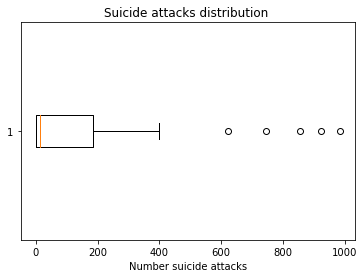

In [24]:
plt.boxplot(num.suicide,vert=False)
plt.xlabel("Number suicide attacks")
plt.title('Suicide attacks distribution ')

<AxesSubplot:>

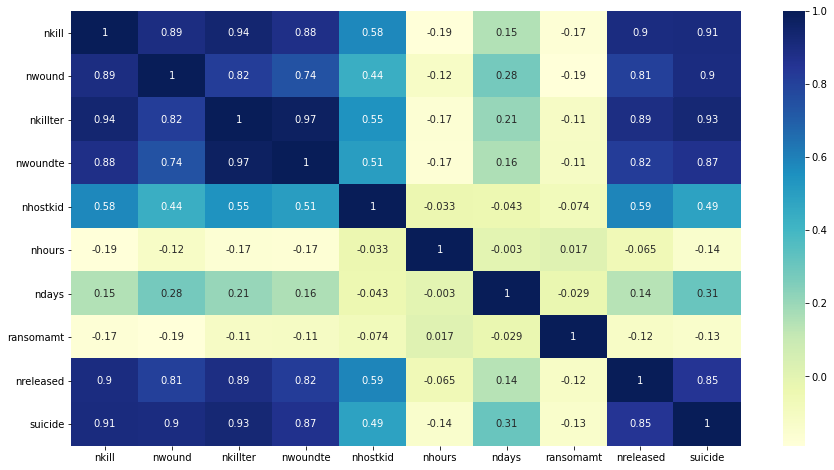

In [25]:
f=plt.subplots(figsize=(15,8))
sns.heatmap(num.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap


Number of suicide attacks increased to 307 in 2007 and again decreased. It reached its peak in 2016 to 984 count and then declined sharply.

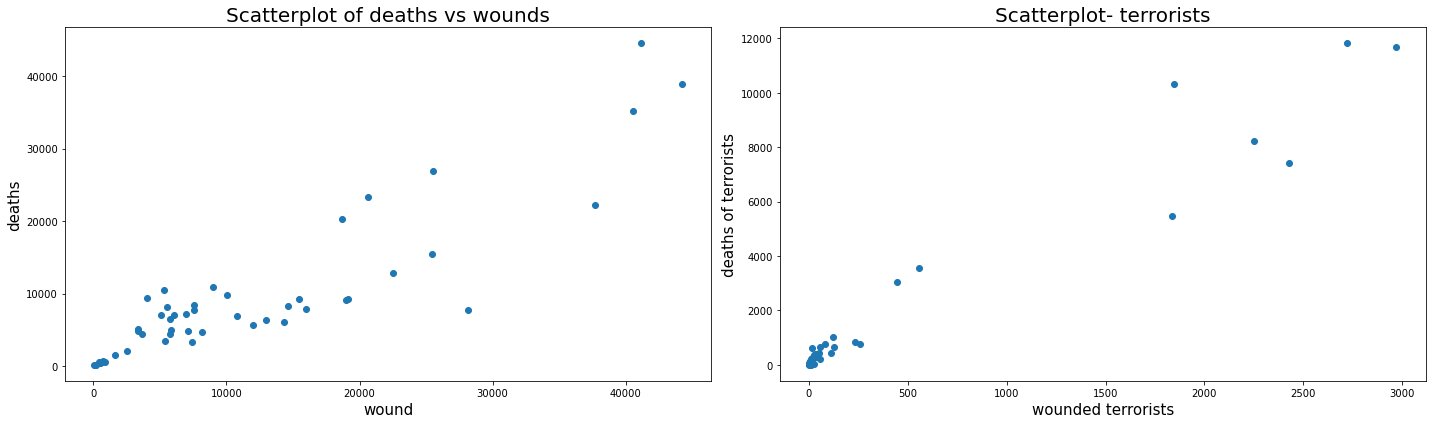

In [26]:
f,ax=plt.subplots(1,2,figsize=(20,6))
ax[0].scatter(x=num.nwound,y=num.nkill)
ax[0].set_ylabel("deaths",fontdict={'fontsize': 15})
ax[0].set_xlabel("wound",fontdict={'fontsize': 15})
ax[0].set_title('Scatterplot of deaths vs wounds',fontdict={'fontsize': 20})
ax[1].scatter(x=num.nwoundte,y=num.nkillter)
ax[1].set_ylabel("deaths of terrorists",fontdict={'fontsize': 15})
ax[1].set_xlabel("wounded terrorists",fontdict={'fontsize': 15})


ax[1].set_title('Scatterplot- terrorists',fontdict={'fontsize': 20})

plt.tight_layout()


Text(0.5, 1.0, 'Scatterplot 4')

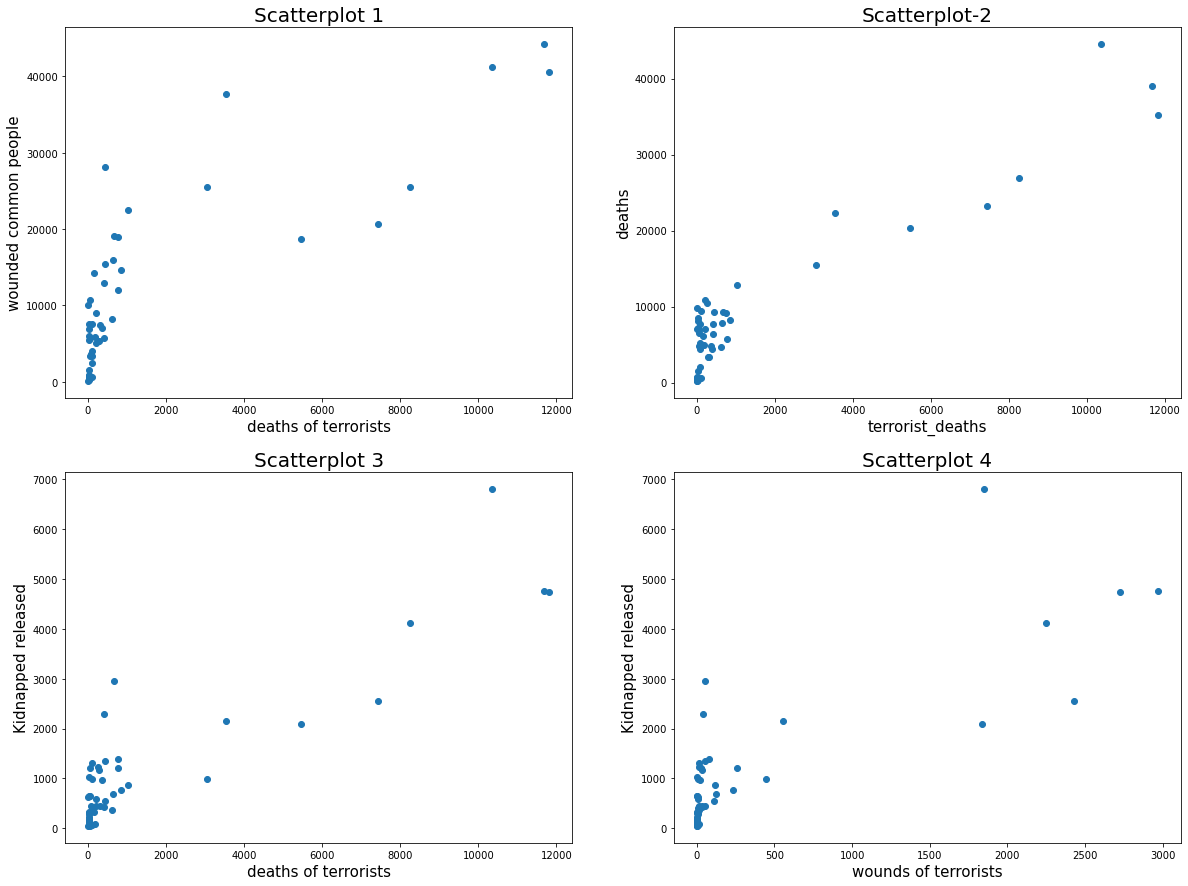

In [27]:
f,ax=plt.subplots(2,2,figsize=(20,15))
ax[0,0].scatter(x=num.nkillter,y=num.nwound)
ax[0,0].set_ylabel("wounded common people",fontdict={'fontsize': 15})
ax[0,0].set_xlabel("deaths of terrorists",fontdict={'fontsize': 15})
ax[0,0].set_title('Scatterplot 1',fontdict={'fontsize': 20})
ax[0,1].scatter(x=num.nkillter,y=num.nkill)
ax[0,1].set_ylabel("deaths",fontdict={'fontsize': 15})
ax[0,1].set_xlabel("terrorist_deaths",fontdict={'fontsize': 15})
ax[0,1].set_title('Scatterplot-2',fontdict={'fontsize': 20})
ax[1,0].scatter(x=num.nkillter,y=num.nreleased)
ax[1,0].set_xlabel("deaths of terrorists",fontdict={'fontsize': 15})
ax[1,0].set_ylabel("Kidnapped released",fontdict={'fontsize': 15})
ax[1,0].set_title('Scatterplot 3',fontdict={'fontsize': 20})
ax[1,1].scatter(x=num.nwoundte,y=num.nreleased)
ax[1,1].set_xlabel("wounds of terrorists",fontdict={'fontsize': 15})
ax[1,1].set_ylabel("Kidnapped released",fontdict={'fontsize': 15})
ax[1,1].set_title('Scatterplot 4',fontdict={'fontsize': 20})

In [30]:
weapon_type=df[df['weapon_type']!='Unknown']['weapon_type']
weapon_type=weapon_type.value_counts()
((weapon_type/sum(weapon_type))*100).round(decimals=2)

Explosives                                                                     54.91
Firearms                                                                       35.53
Incendiary                                                                      6.81
Melee                                                                           2.25
Chemical                                                                        0.19
Sabotage Equipment                                                              0.10
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)     0.09
Other                                                                           0.07
Biological                                                                      0.02
Fake Weapons                                                                    0.02
Radiological                                                                    0.01
Name: weapon_type, dtype: float64

In [31]:
def weapon(df):
    d=[]
    #This loop stores the weapon types apart from the ones which are mostly used into another category named "Others"
    for i in df['weapon_type']:
        if (i!='Explosives') & (i!='Firearms') & (i!='Incendiary') & (i!='Melee'):
            d.append('Others')
        else:
            d.append(i)
    return d    
d=weapon(df)

In [32]:
weapon_type_sub=pd.DataFrame(d)
weapon_type_sub=weapon_type_sub.value_counts()
weapon_type_sub
#The value counts of the list converted into a dataframe is stored in weapon_type_sub
((weapon_type_sub/sum(weapon_type_sub))*100).round(decimals=2)

Explosives    49.87
Firearms      32.27
Others         9.63
Incendiary     6.19
Melee          2.05
dtype: float64

Mostly the weapons used were explosives, firearms,incendiary and Melee(A melee or pell-mell is disorganized hand-to-hand combat in battles fought at abnormally close range with little central control once it starts.)

Since the values apart from the Explosives, Firearms, Incendiary and Melee are very small, they have been combined together into "Others" category and a pie plot has been obtained for the same.

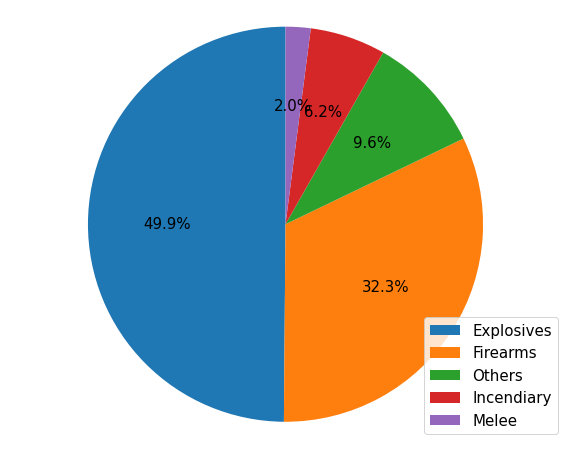

In [33]:
plt.figure(figsize=(10,8))
plt.pie(weapon_type_sub,autopct='%1.1f%%', startangle=90,textprops = {"fontsize":15})
plt.axis('equal')
legend=['Explosives','Firearms','Others','Incendiary','Melee']
plt.legend( loc = 'lower right', labels=legend,prop={"size":15})
plt.show()

In [34]:
attack_type=df[df['attack_type']!='Unknown']['attack_type']

attack_type=attack_type.value_counts()
((attack_type/sum(attack_type))*100).round(decimals=2)

Bombing/Explosion                      49.79
Armed Assault                          24.75
Assassination                          10.91
Hostage Taking (Kidnapping)             6.89
Facility/Infrastructure Attack          6.07
Unarmed Assault                         0.62
Hostage Taking (Barricade Incident)     0.59
Hijacking                               0.38
Name: attack_type, dtype: float64

In [35]:
def attack(df):
    d1=[]
    #This loop stores the weapon types apart from the ones which are mostly used into another category named "Others"
    for i in df['attack_type']:
        if (i!='Bombing/Explosion') & (i!='Armed Assault') & (i!='Assassination') & (i!='Hostage Taking (Kidnapping)'):
            d1.append('Others')
        else:
            d1.append(i)
    return d1
d1=attack(df)

In [36]:
attack_type_sub=pd.DataFrame(d1)
attack_type_sub=attack_type_sub.value_counts()
#The value counts of the list converted into a dataframe is stored in weapon_type_sub
(attack_type_sub/sum(attack_type_sub)*100).round(decimals=2)


Bombing/Explosion              47.42
Armed Assault                  23.57
Others                         12.06
Assassination                  10.39
Hostage Taking (Kidnapping)     6.56
dtype: float64

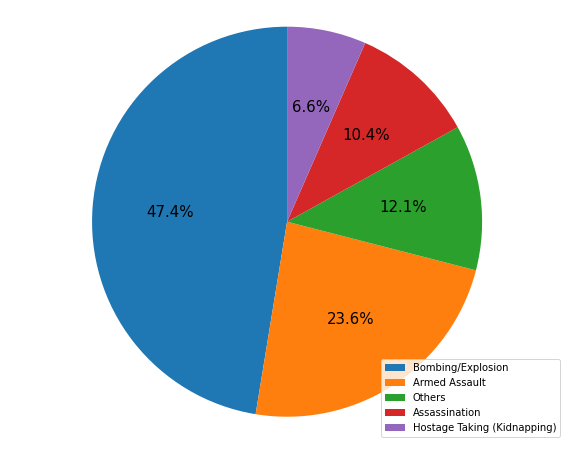

In [37]:
plt.figure(figsize=(10,8))
plt.pie(attack_type_sub,autopct='%1.1f%%', startangle=90,textprops = {"fontsize":15})
plt.axis('equal')
legend=['Bombing/Explosion','Armed Assault','Others','Assassination','Hostage Taking (Kidnapping)' ]
plt.legend( loc = 'lower right', labels=legend,prop={"size":10})
plt.show()

A similar kind of analysis has been done to understand the nature of attacks that were launched by the terrorists. 
From the pie chart, it is clear that mostly bombing/explosion is used, followed by armed assault and so on.

In [38]:
import os
import conda

conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib

from mpl_toolkits.basemap import Basemap

In [39]:
df_groups=df[['terr_group_name','latitude','longitude']]


In [40]:
df_groups.drop(df_groups.index[df_groups['terr_group_name'] == 'Unknown'], inplace = True)
df_groups

,terr_group_name,latitude,longitude
0,MANO-D,18.456792,-69.951164
1,23rd of September Communist League,19.371887,0.086624
5,Black Nationalists,37.005105,-89.176269
6,Tupamaros (Uruguay),-34.891151,-56.187214
8,New Year's Gang,43.076592,-89.412488
...,...,...,...
201172,New People's Army (NPA),8.643644,125.352112
201173,Caucasus Province of the Islamic State,43.180183,44.798863
201175,Arakan Army (AA),20.612592,92.688668
201176,Separatists,6.430046,10.734197


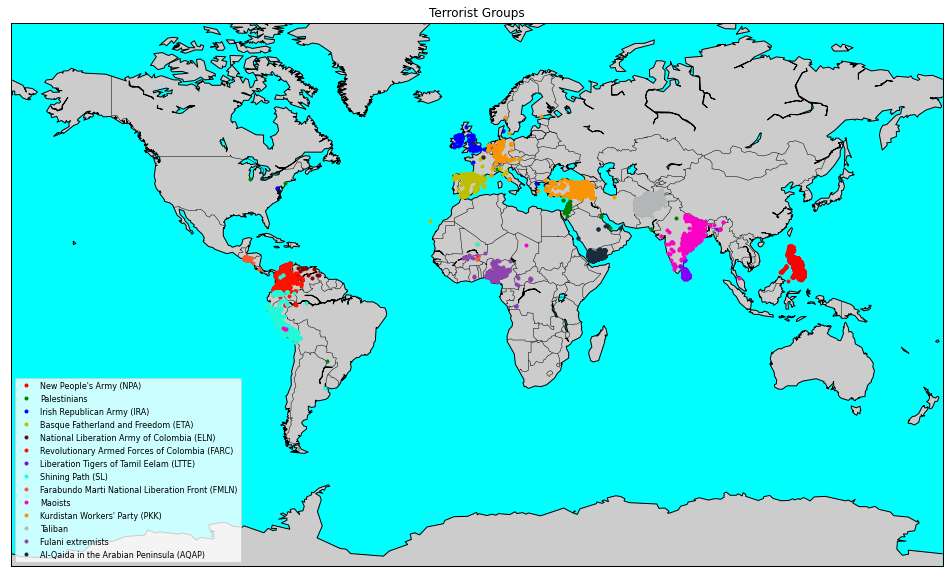

In [41]:
groups=df_groups[df_groups['terr_group_name'].isin(df_groups['terr_group_name'].value_counts()[:20].index)]
m = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c',lat_0=True,lat_1=True)
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(lake_color='aqua')
m.drawmapboundary(fill_color='aqua')
fig=plt.gcf()
fig.set_size_inches(22,10)
colors=['r','g','b','y','#800000','#ff1100','#8202fa','#20fad9','#ff5733','#fa02c6',"#f99504",'#b3b6b7','#8e44ad','#1a2b3c']
group=list(groups['terr_group_name'].unique())
def group_point(group,color,label):
    lat_group=list(groups[groups['terr_group_name']==group].latitude)
    long_group=list(groups[groups['terr_group_name']==group].longitude)
    x_group,y_group=m(long_group,lat_group)
    m.plot(x_group,y_group,'go',markersize=3,color=j,label=i)
for i,j in zip(group,colors):
    group_point(i,j,i)
legend=plt.legend(loc='lower left',frameon=True,prop={'size':8})
frame=legend.get_frame()
frame.set_facecolor('white')
plt.title('Terrorist Groups')
plt.show()

# EDA Part 2: Considering the top 5 countries

Using the bar plot below, we have found out the top nations where maximum attacks have taken place from 1970 to 2019.

<AxesSubplot:xlabel='count', ylabel='country_name'>

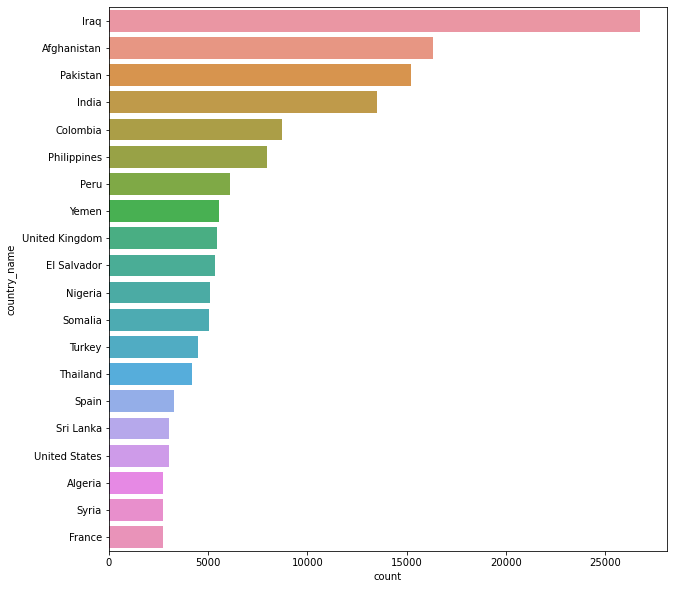

In [42]:
f=plt.subplots(figsize=(10,10))
sns.countplot(y='country_name',data=df,order=df.country_name.value_counts().head(20).index)

Country-wise the maximum number of attacks have occured in Iraq, followed by Afghanistan, Pakistan, India, Columbia, Phillippines, Peru and so on. 

We have focussed our analysis on the top 5 vulnerable countries and then looked at the condition of India since it is in the 4th position from the top which is of course a matter of concern for all Indians.

The bar plot shows the total number of attacks across all the years from 1970 to 2019. The minimum number of attacks (that is equal to 1) are faced by some countries like the Vatican City, South Vietnam,New Hebrides, etc.

Let us consider the top 5 countries that have had the maximum number of terrorist attacks from 1970 till 2019.

In [43]:
#top_5 dataframe stores the top_5 countries data
top_5=df[(df.country_name=='Iraq') | (df.country_name=='Afghanistan') | (df.country_name=='Pakistan') | (df.country_name=='India') | (df.country_name=='Colombia')]

In [44]:
t1=top_5[['country_name','region_name']]
t1.drop_duplicates(keep='first',inplace=True)
t1.set_index('country_name')


,region_name
country_name,
Colombia,South America
Pakistan,South Asia
India,South Asia
Afghanistan,South Asia
Iraq,Middle East & North Africa


The above table shows the country-wise region division. We have obtained an area plot on the regions below. 

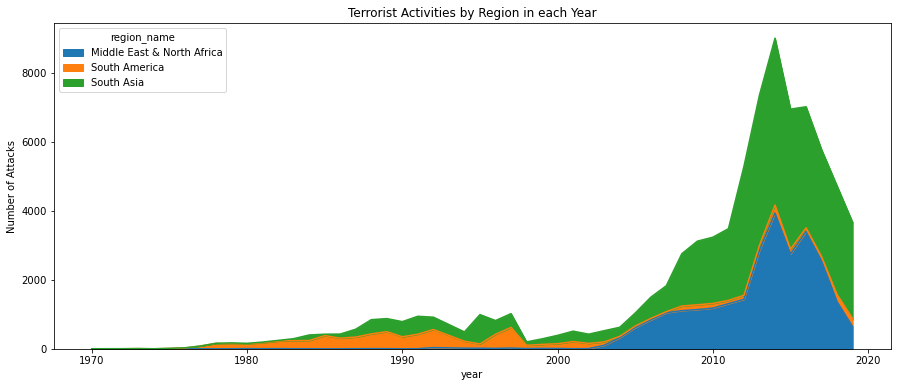

In [45]:
pd.crosstab(top_5.year, top_5.region_name).plot(kind='area',figsize=(15,6))
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.show()

The stacked area plot shows the trend across the years which is an increasing one with certain fluctuations for different regions along with the total shown in form of the area of occupied by each region.

We have Afghanistan, Pakistan and India in the region of South Asia which occupies the maximum area depicting that maximum attacks have occured in this region. Next comes, Iraq for the Middle East and North African region followed by Colombia in South American region.

In [46]:
#This dataframe displays the top 5 terrorist groups that have launched the terrorist attacks in the top 5 vulnerable countries.
group_attacks = top_5['terr_group_name'].value_counts().to_frame().drop('Unknown').reset_index()[:5]
group_attacks.columns = ['Terrorist Group', 'Total Attacks']
group_attacks

,Terrorist Group,Total Attacks
0,Taliban,10092
1,Islamic State of Iraq and the Levant (ISIL),5857
2,Revolutionary Armed Forces of Colombia (FARC),2468
3,Communist Party of India - Maoist (CPI-Maoist),2036
4,Maoists,1745


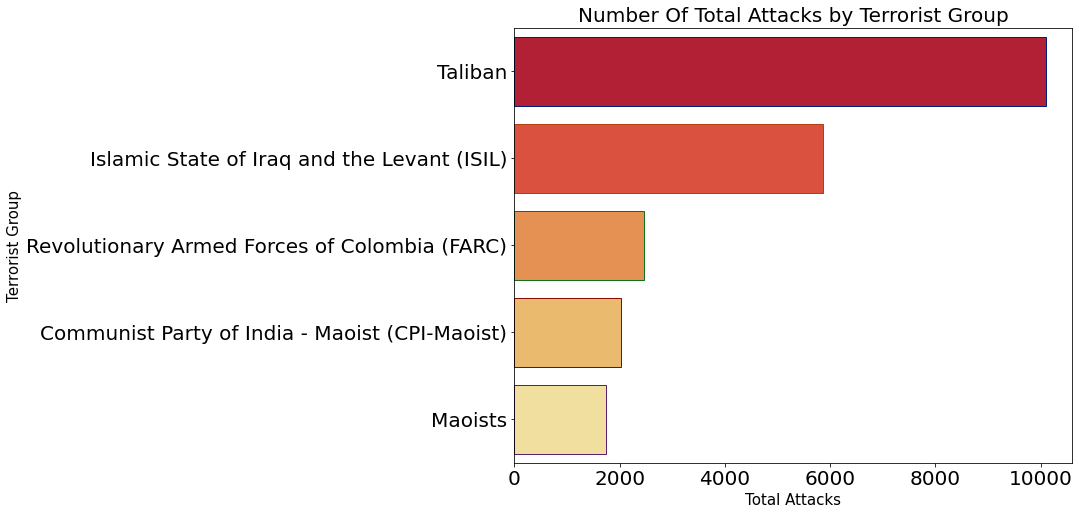

In [47]:
plt.subplots(figsize=(10,8))
sns.barplot(y=group_attacks['Terrorist Group'], x=group_attacks['Total Attacks'], palette='YlOrRd_r',
            edgecolor=sns.color_palette('dark', 10))
# plt.xticks()
plt.title('Number Of Total Attacks by Terrorist Group',fontdict={'fontsize':20})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Total Attacks",fontsize=15)
plt.ylabel("Terrorist Group",fontsize=15)
plt.show()


The above bar plot displays that among all the other terrorist groups, Taliban has launched the maximum number of attacks.

In [48]:
#cross tabulation for the country vs cause of attacks
cross_tab_prop=pd.crosstab(index=top_5.country_name,columns=top_5.Cause,normalize="index")
cross_tab_prop

Cause,"crit1,crit2","crit1,crit2,crit3","crit1,crit3","crit2,crit3"
country_name,,,,
Afghanistan,0.147612,0.848526,0.001716,0.002146
Colombia,0.106497,0.878289,0.003660,0.011553
India,0.052237,0.925577,0.007717,0.014469
Iraq,0.107942,0.888395,0.001346,0.002317
Pakistan,0.095147,0.875855,0.007891,0.021107


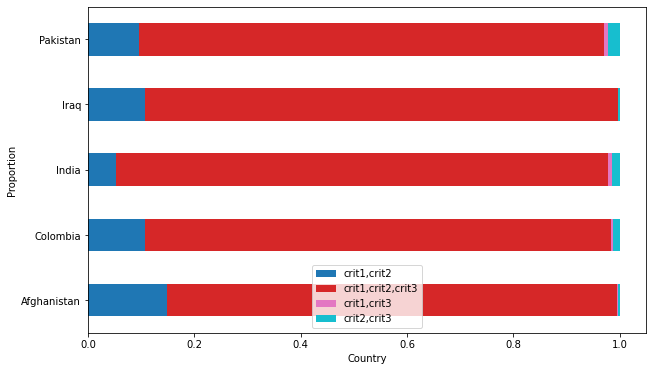

In [49]:

cross_tab_prop.plot(kind='barh', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend()
plt.xlabel("Country")
plt.ylabel("Proportion")

plt.show()

> Criterion 1: POLITICAL, ECONOMIC, RELIGIOUS, OR SOCIAL GOAL (CRIT1): The violent act must be aimed at attaining a political, economic, religious, or social goal. 

> Criterion 2: INTENTION TO COERCE, INTIMIDATE OR PUBLICIZE TO LARGER AUDIENCE(S) 
(CRIT2):To satisfy this criterion there must be evidence of an intention to coerce, intimidate, or 
convey some other message to a larger audience (or audiences) than the immediate 
victims. 

> Criterion 3: OUTSIDE INTERNATIONAL HUMANITARIAN LAW (CRIT3): The action is outside the context of legitimate warfare activities, insofar as it targets 
non-combatants



Mostly all the terrorist incidents that occured in the top 5 countries were aimed at all the three criterias as can be seen from the stacked bar plot.



# EDA Part 3: Analysing the situation in India

In [51]:
# India dataframe stores the data only respective to India
india=top_5[top_5['country_name']=='India']

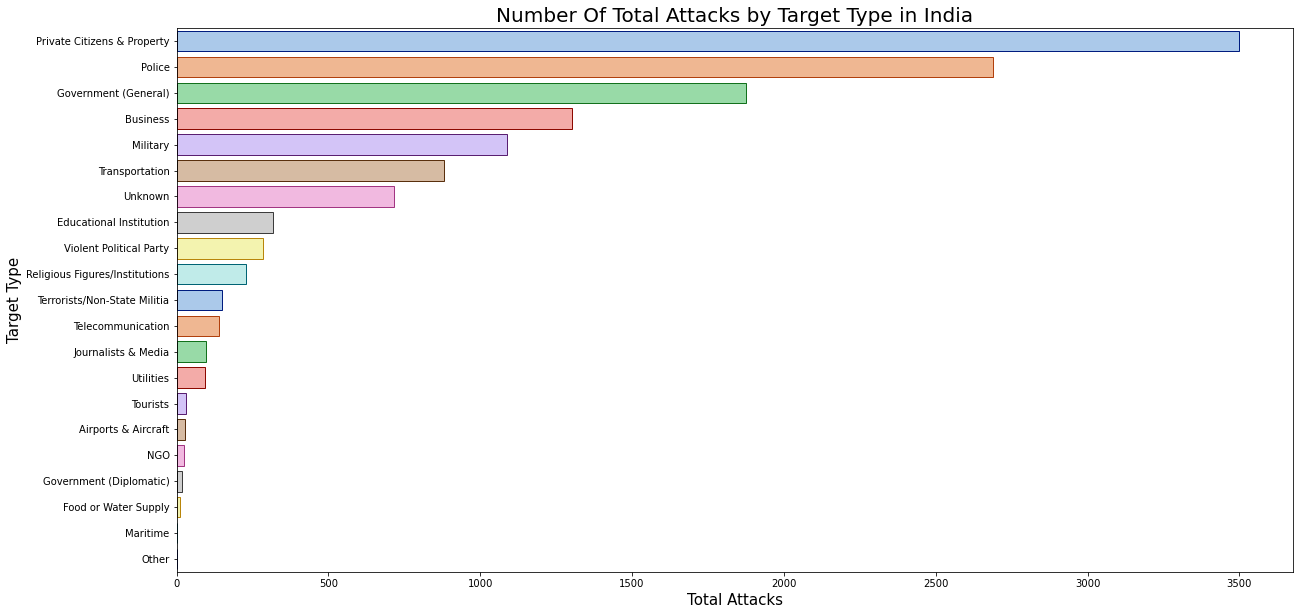

In [52]:
target_type_india = india['target_type'].value_counts().to_frame().reset_index()
target_type_india.columns = ['Target Type', 'Total Attacks']
plt.subplots(figsize=(20,10))
sns.barplot(y=target_type_india['Target Type'], x=target_type_india['Total Attacks'], palette='pastel',
            edgecolor=sns.color_palette('dark', 10))
plt.title('Number Of Total Attacks by Target Type in India',fontdict={'fontsize':20})
plt.xlabel("Total Attacks",fontsize=15)
plt.ylabel("Target Type",fontsize=15)
plt.show()

The above bar plot depicts the target types of the attacks launched in India. Mostly the attacks were on Private Citizens and Property, police, government, business and so on.

In [53]:
group_attacks_india = india['terr_group_name'].value_counts().to_frame().drop('Unknown').reset_index()[:5]
group_attacks_india.columns = ['Terrorist Group', 'Total Attacks']
group_attacks_india

,Terrorist Group,Total Attacks
0,Communist Party of India - Maoist (CPI-Maoist),2036
1,Maoists,1745
2,Sikh Extremists,710
3,United Liberation Front of Assam (ULFA),379
4,Hizbul Mujahideen (HM),269


Out of total 313 terrorist groups, most of the attacks were launched by CPI-Maoist followed by Maoists, Sikh Extremists and so on in India.

In [54]:
#Stores the data on states in India
#india_state=india.state.value_counts().sort_values(ascending=True)

india_state1=india.state.value_counts().sort_values(ascending=True)
f=(india_state1/sum(india_state1))*100
print(f.round(decimals=2)[:5])

Puducherry          0.01
Sikkim              0.03
Goa                 0.04
Uttaranchal         0.18
Himachal Pradesh    0.20
Name: state, dtype: float64


The above table displays the percentage of attacks in the top 5 states of India.

<AxesSubplot:>

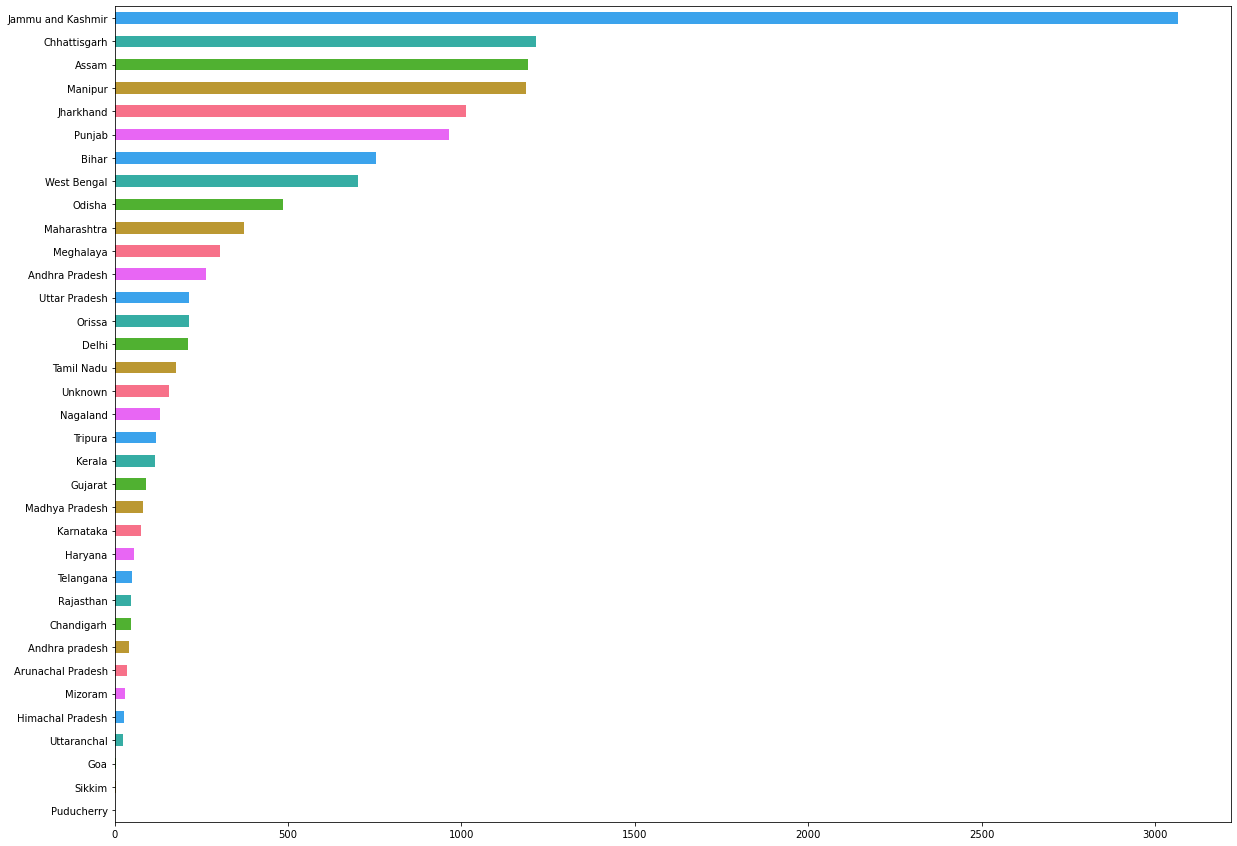

In [55]:
f=plt.subplots(figsize=(20,15))
india_state1.plot(kind='barh',color=sns.color_palette('husl'))

In [56]:
def num(df):
    num=pd.DataFrame()
    num['nkill']=(df[["year","nkill"]].groupby("year").aggregate(np.sum)).nkill.round(decimals=2).to_list()
    num['nwound']=(df[["year","nwound"]].groupby("year").aggregate(np.sum)).nwound.round(decimals=2).to_list()
    num['nkillter']=(df[["year","nkillter"]].groupby("year").aggregate(np.sum)).nkillter.round(decimals=2).to_list()
    num['nwoundte']=(df[["year","nwoundte"]].groupby("year").aggregate(np.sum)).nwoundte.round(decimals=2).to_list()
    num['nhostkid']=(df[["year","nhostkid"]].groupby("year").aggregate(np.sum)).nhostkid.round(decimals=2).to_list()
    num['nhours']=(df[["year","nhours"]].groupby("year").aggregate(np.average)).nhours.round(decimals=2).to_list()
    num['ndays']=(df[["year","ndays"]].groupby("year").aggregate(np.average)).ndays.round(decimals=2).to_list()
    num['ransomamt']=(df[["year","ransomamt"]].groupby("year").aggregate(np.average)).ransomamt.round(decimals=2).to_list()
    num['nreleased']=(df[["year","nreleased"]].groupby("year").aggregate(np.sum)).nreleased.round(decimals=2).to_list()
    num.index=df.year.drop_duplicates()
    return num

In [57]:
india_num=num(india)
india_num

,nkill,nwound,nkillter,nwoundte,nhostkid,nhours,ndays,ransomamt,nreleased
year,,,,,,,,,
1972,0,0,0,0,187,0.00,0.00,5000000.00,187
1975,4,0,0,0,0,0.00,0.00,0.00,0
1976,0,0,0,0,0,0.00,0.00,0.00,0
1977,0,0,0,0,146,0.00,0.00,6000000.00,0
1979,31,19,0,0,0,0.00,0.00,0.00,0
1980,17,13,0,0,0,0.00,0.00,0.00,0
1981,24,12,0,0,117,0.00,0.00,0.00,44
1982,64,102,7,0,69,0.00,0.08,0.00,0
1983,59,217,1,0,0,0.00,0.00,0.00,0


Text(0.5, 1.0, 'Released each year distribution')

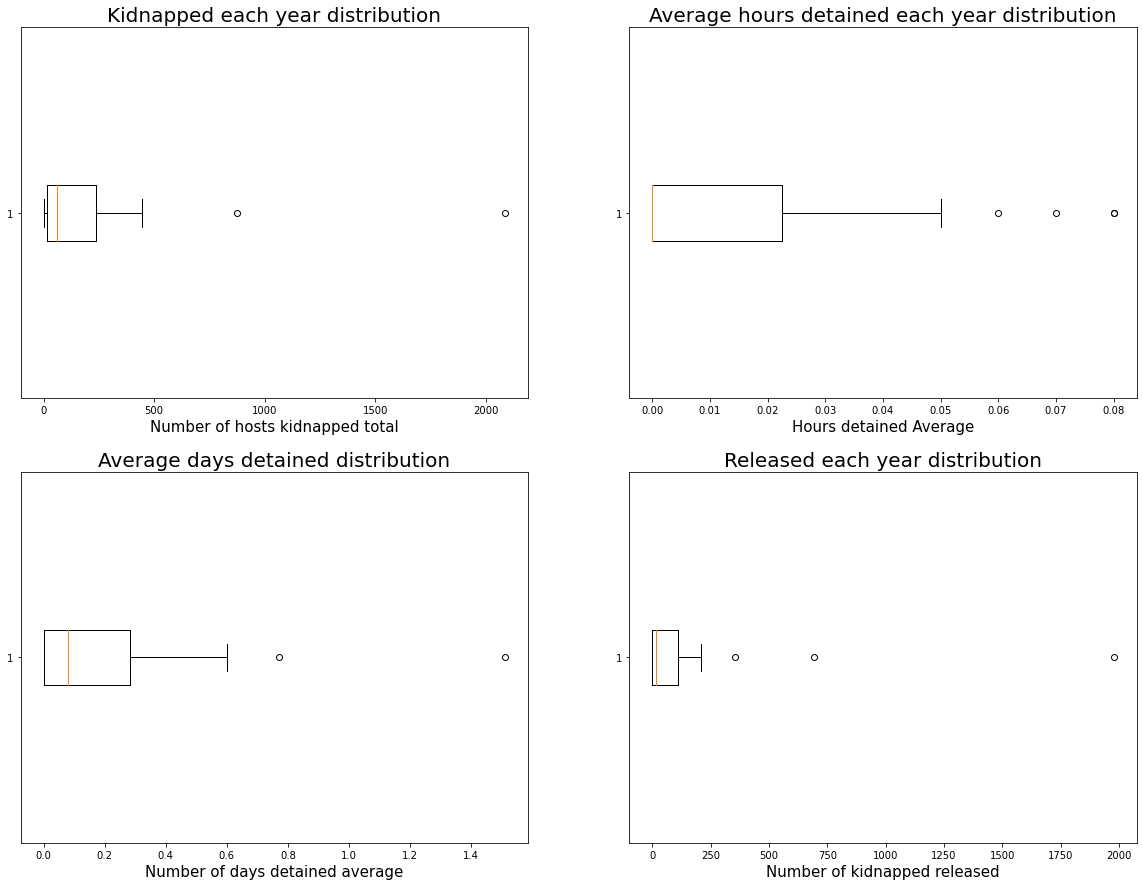

In [58]:
f,ax=plt.subplots(2,2,figsize=(20,15))
ax[0,0].boxplot(india_num.nhostkid,vert=False)
ax[0,0].set_xlabel("Number of hosts kidnapped total",fontdict={'fontsize': 15})
ax[0,0].set_title('Kidnapped each year distribution',fontdict={'fontsize': 20})
ax[0,1].boxplot(india_num.nhours,vert=False)
ax[0,1].set_xlabel("Hours detained Average",fontdict={'fontsize': 15})
ax[0,1].set_title('Average hours detained each year distribution',fontdict={'fontsize': 20})
ax[1,0].boxplot(india_num.ndays,vert=False)
ax[1,0].set_xlabel("Number of days detained average",fontdict={'fontsize': 15})
ax[1,0].set_title('Average days detained distribution',fontdict={'fontsize': 20})
ax[1,1].boxplot(india_num.nreleased,vert=False)
ax[1,1].set_xlabel("Number of kidnapped released",fontdict={'fontsize': 15})
ax[1,1].set_title('Released each year distribution',fontdict={'fontsize': 20})

Major terrorist activities have occured in the States Jammu and Kashmir, Chhattisgarh, Assam, Manipur, Jharkhand and so on.

For Jammu and Kashmir, the number of terrorist activities are very high in comparison to the other states.

In [59]:
india_num.describe()

,nkill,nwound,nkillter,nwoundte,nhostkid,nhours,ndays,ransomamt,nreleased
count,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,4.400000e+01,44.000000
mean,456.045455,685.090909,23.500000,4.659091,180.568182,0.014091,0.184091,2.562336e+05,114.931818
std,317.826920,500.660857,30.642348,11.364865,339.482260,0.023359,0.282055,1.162812e+06,313.069901
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,246.750000,327.250000,0.000000,0.000000,16.000000,0.000000,0.000000,0.000000e+00,0.000000
50%,467.000000,681.500000,11.500000,0.000000,60.500000,0.000000,0.080000,0.000000e+00,14.000000
75%,662.750000,972.250000,34.000000,3.250000,237.750000,0.022500,0.282500,6.563275e+02,108.500000
max,1152.000000,2138.000000,108.000000,65.000000,2086.000000,0.080000,1.510000,6.000000e+06,1976.000000


In [60]:
#Storing the top 5 vulnerable states in India
top_5_states=india[(india['state']=='Jammu and Kashmir')|(india['state']=='Chhattisgarh')|(india['state']=='Assam')|(india['state']=='Manipur')|(india['state']=='Jharkhand')]

Text(0.5, 1.0, 'Injuries each year distribution of terrorists')

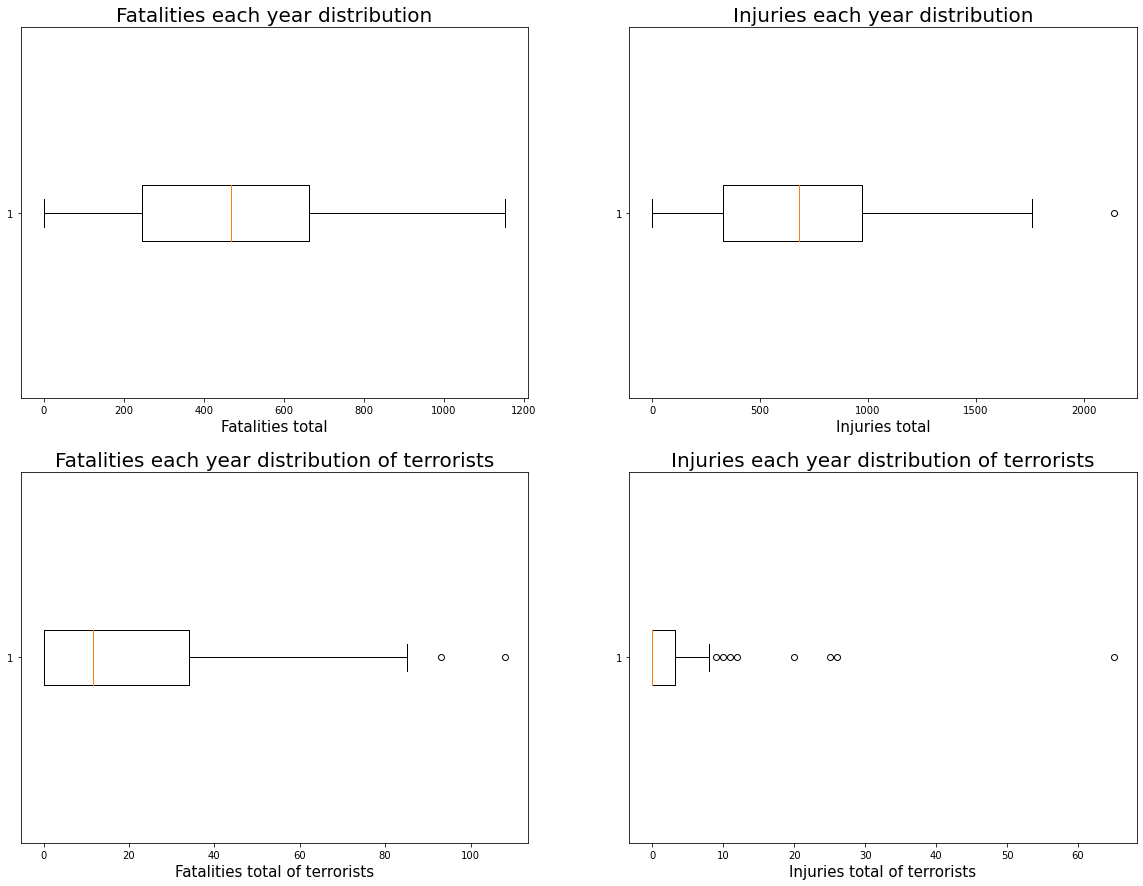

In [61]:
f,ax=plt.subplots(2,2,figsize=(20,15))
ax[0,0].boxplot(india_num.nkill,vert=False)
ax[0,0].set_xlabel("Fatalities total",fontdict={'fontsize': 15})
ax[0,0].set_title('Fatalities each year distribution',fontdict={'fontsize': 20})
ax[0,1].boxplot(india_num.nwound,vert=False)
ax[0,1].set_xlabel("Injuries total",fontdict={'fontsize': 15})
ax[0,1].set_title('Injuries each year distribution',fontdict={'fontsize': 20})
ax[1,0].boxplot(india_num.nkillter,vert=False)
ax[1,0].set_xlabel("Fatalities total of terrorists",fontdict={'fontsize': 15})
ax[1,0].set_title('Fatalities each year distribution of terrorists',fontdict={'fontsize': 20})
ax[1,1].boxplot(india_num.nwoundte,vert=False)
ax[1,1].set_xlabel("Injuries total of terrorists",fontdict={'fontsize': 15})
ax[1,1].set_title('Injuries each year distribution of terrorists',fontdict={'fontsize': 20})

In [62]:
#Crosstab to understand the main causes of the attacks in the top 5 states
cause_india=pd.crosstab(index=top_5_states.state,columns=top_5_states.Cause,normalize="index")
cause_india

Cause,"crit1,crit2","crit1,crit2,crit3","crit1,crit3","crit2,crit3"
state,,,,
Assam,0.019295,0.957215,0.010906,0.012584
Chhattisgarh,0.058388,0.938322,0.000822,0.002467
Jammu and Kashmir,0.109299,0.878956,0.003263,0.008483
Jharkhand,0.017787,0.954545,0.014822,0.012846
Manipur,0.108769,0.861720,0.009275,0.020236


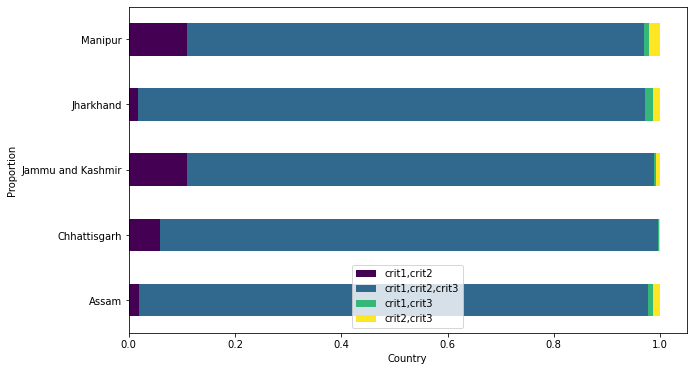

In [63]:
cause_india.plot(kind='barh', 
                    stacked=True, 
                    colormap='viridis', 
                    figsize=(10, 6))

plt.legend()
plt.xlabel("Country")
plt.ylabel("Proportion")

plt.show()

In the top 5 Indian States as well, we can observe that most of the attacks have occurred as a result of all the three criterias.

In [64]:
s1=attack(top_5_states)
s2=weapon(top_5_states)
top_5_states['attack_type_com']=s1
top_5_states['weapon_type_com']=s2

In [65]:
c2=pd.crosstab(top_5_states.state,top_5_states.attack_type_com)
c3=pd.crosstab(top_5_states.state,top_5_states.weapon_type_com)

<AxesSubplot:ylabel='state'>

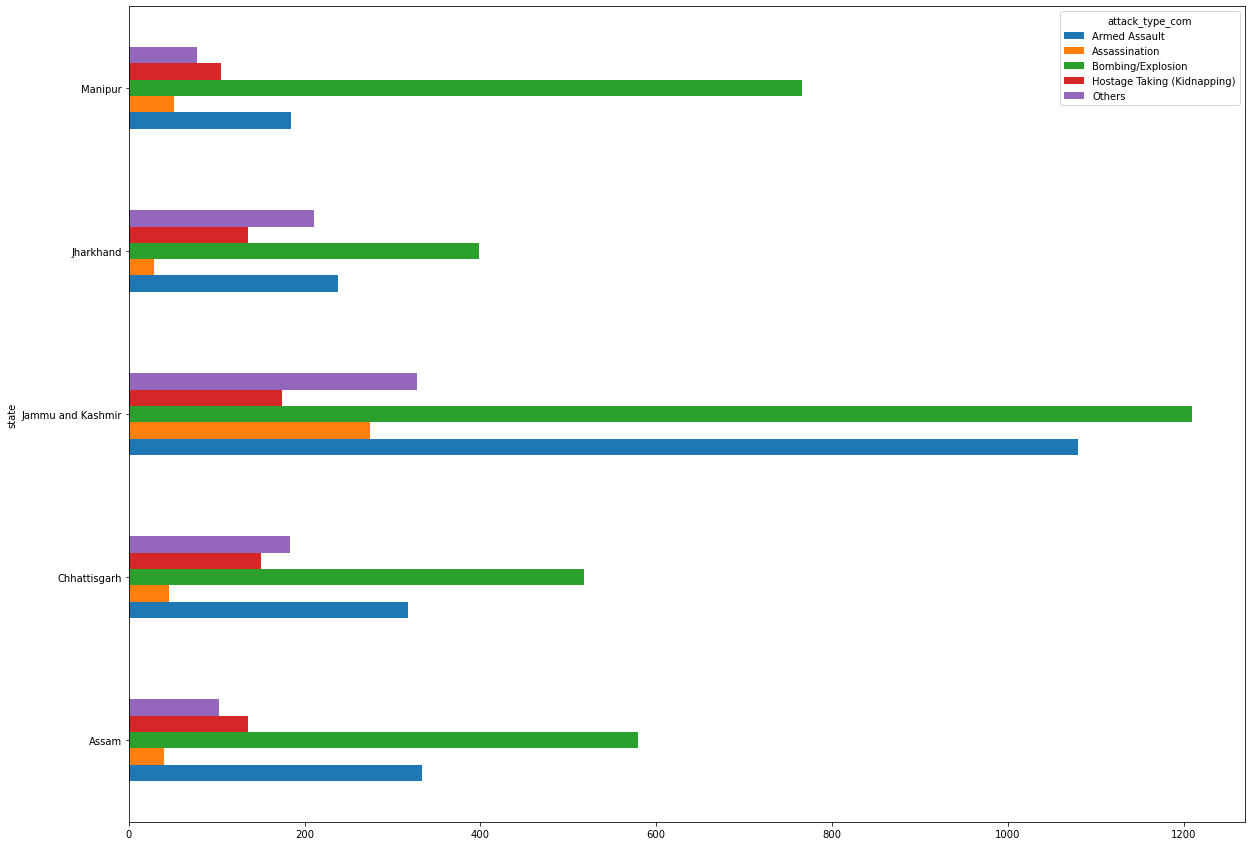

In [66]:
c2.plot(kind='barh',figsize=(20,15))

For all the top 5 states, attack type used was mainly bombing/explosion followed by armed assault.

<AxesSubplot:ylabel='state'>

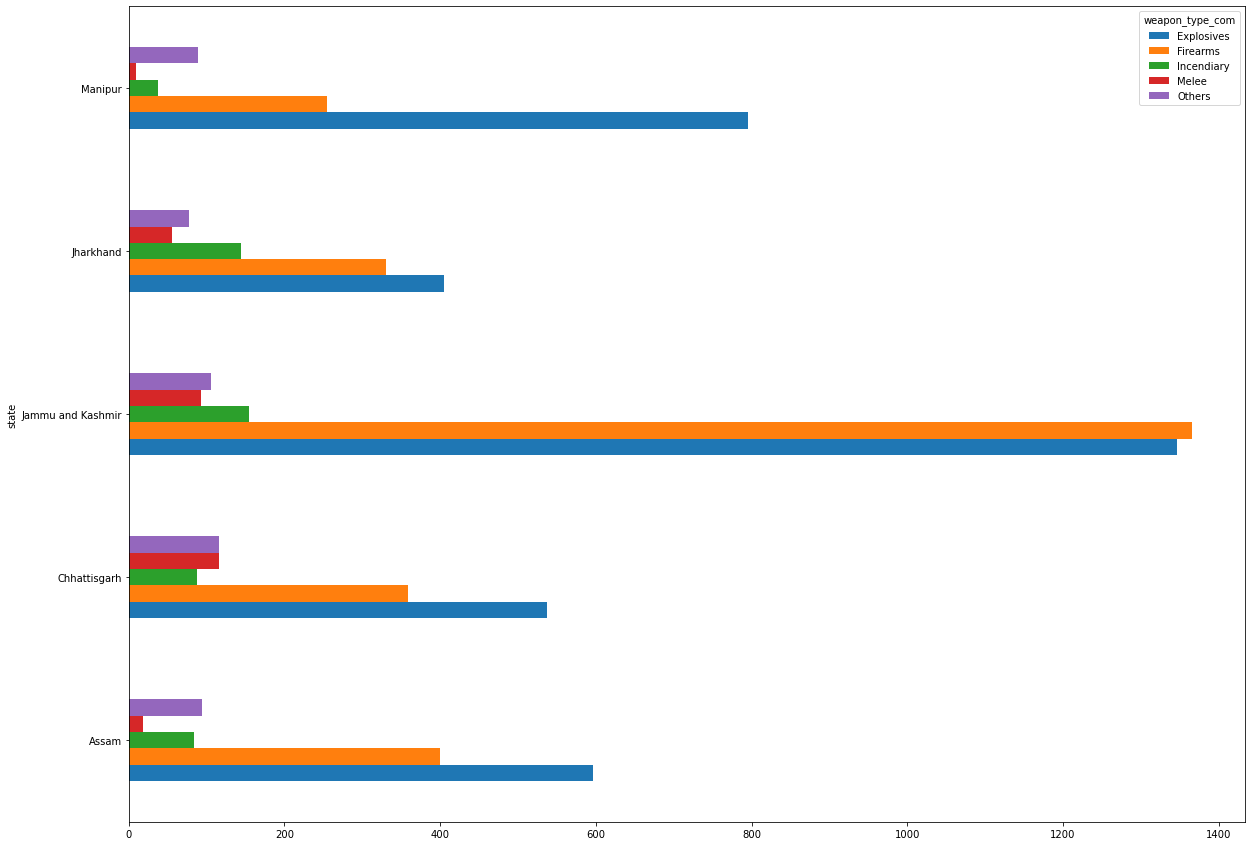

In [68]:
c3.plot(kind='barh',figsize=(20,15))

Weapon type used was mostly explosives for all states except Jammu and Kashmir where both firearms and explosives dominate.

Next, let us see which are the top cities in Jammu and Kashmir that has experienced nearly 22% of the total terrorist attacks in India from 1970 to 2019.

In [69]:
cities=top_5_states[(top_5_states['state']=='Jammu and Kashmir')]
#cities=cities[cities!='Unknown'].value_counts()

In [70]:
Jam=num(cities)

In [71]:
Jam

,nkill,nwound,nkillter,nwoundte,nhostkid,nhours,ndays,ransomamt,nreleased
year,,,,,,,,,
1984,3,0,0,0,0,0.00,0.00,0,0
1986,1,5,0,0,0,0.00,0.00,0,0
1988,36,81,0,0,0,0.00,0.00,0,0
1989,37,132,0,0,1,0.00,0.09,0,1
1990,194,55,0,0,11,0.00,0.12,0,8
1991,114,227,1,0,20,0.00,6.64,0,5
1992,168,148,0,0,17,0.00,1.91,0,4
1994,102,154,0,0,3,0.00,0.53,0,2
1995,143,293,5,0,13,0.00,0.03,0,6


{'whiskers': [<matplotlib.lines.Line2D at 0x1718bda3310>,
 'caps': [<matplotlib.lines.Line2D at 0x1718bda39d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1718bd95f70>],
 'medians': [<matplotlib.lines.Line2D at 0x1718bdaf0d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1718bdaf430>],
 'means': []}

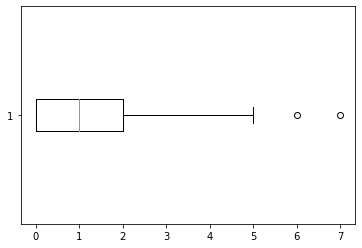

In [72]:
t1=india[india.state=='Jammu and Kashmir'][['suicide','year']].groupby('year').sum()
plt.boxplot(t1,vert=False)

In [73]:
india

,year,month,day,country_name,region_name,state,city,crit1,crit2,crit3,...,nwound,nwoundte,latitude,longitude,nhostkid,nhours,ndays,ransomamt,nreleased,Cause
1186,1972,2,22,India,South Asia,Delhi,New Delhi,1,1,1,...,0,0,28.585836,77.153336,187,0,0,5000000,187,"crit1,crit2,crit3"
2764,1975,1,2,India,South Asia,Bihar,Samastipur,1,1,1,...,0,0,25.863042,85.781004,0,0,0,0,0,"crit1,crit2,crit3"
3857,1976,5,26,India,South Asia,Delhi,New Delhi,1,1,1,...,0,0,28.585836,77.153336,0,0,0,0,0,"crit1,crit2,crit3"
5327,1977,9,28,India,South Asia,Maharashtra,Bombay,1,1,1,...,0,0,19.075984,72.877656,146,0,0,6000000,0,"crit1,crit2,crit3"
7337,1979,1,13,India,South Asia,Assam,Unknown,1,1,1,...,0,0,26.200605,92.937574,0,0,0,0,0,"crit1,crit2,crit3"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201117,2019,12,29,India,South Asia,Jammu and Kashmir,Keri,1,1,1,...,0,0,33.328840,74.227820,0,0,0,0,0,"crit1,crit2,crit3"
201118,2019,12,29,India,South Asia,Chhattisgarh,Chihka,1,1,1,...,1,0,19.037045,81.100473,1,0,0,0,1,"crit1,crit2,crit3"
201167,2019,12,31,India,South Asia,Jharkhand,Malhan,1,1,1,...,0,0,23.648640,84.840340,0,0,0,0,0,"crit1,crit2,crit3"
201168,2019,12,31,India,South Asia,Jharkhand,Munkeri,1,1,1,...,1,0,24.364841,84.246319,0,0,0,0,0,"crit1,crit2,crit3"


In [74]:
t2=india[india.state=='Jammu and Kashmir'][['terr_group_name','year']].groupby('year').sum()

In [75]:
t2

,terr_group_name
year,
1984,Sikh ExtremistsUnknown
1986,Unknown
1988,UnknownSikh ExtremistsUnknownUnknownSikh Extre...
1989,UnknownUnknownUnknownUnknownUnknownUnknownUnkn...
1990,UnknownUnknownUnknownUnknownUnknownUnknownUnkn...
1991,Kashmiri extremistsUnknownUnknownUnknownUnknow...
1992,Ikhwan-ul-MuslimeenMuslim MilitantsMuslim Mili...
1994,UnknownKashmiri extremistsMuslim MilitantsMusl...
1995,Kashmiri extremistsKashmiri extremistsKashmiri...


In [76]:
t1.describe()

,suicide
count,33.000000
mean,1.484848
std,1.986221
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,7.000000


In [77]:
cities.nhostkid.value_counts()

0      2861
1       135
2        31
3         8
6         5
4         3
5         3
9         2
8         2
10        2
12        2
18        2
25        1
19        1
15        1
22        1
7         1
28        1
16        1
14        1
183       1
Name: nhostkid, dtype: int64

The mostly affected cities in the state of Jammu and Kashmir are Srinagar, Sopore, Anantnag, Jammu and Tral.

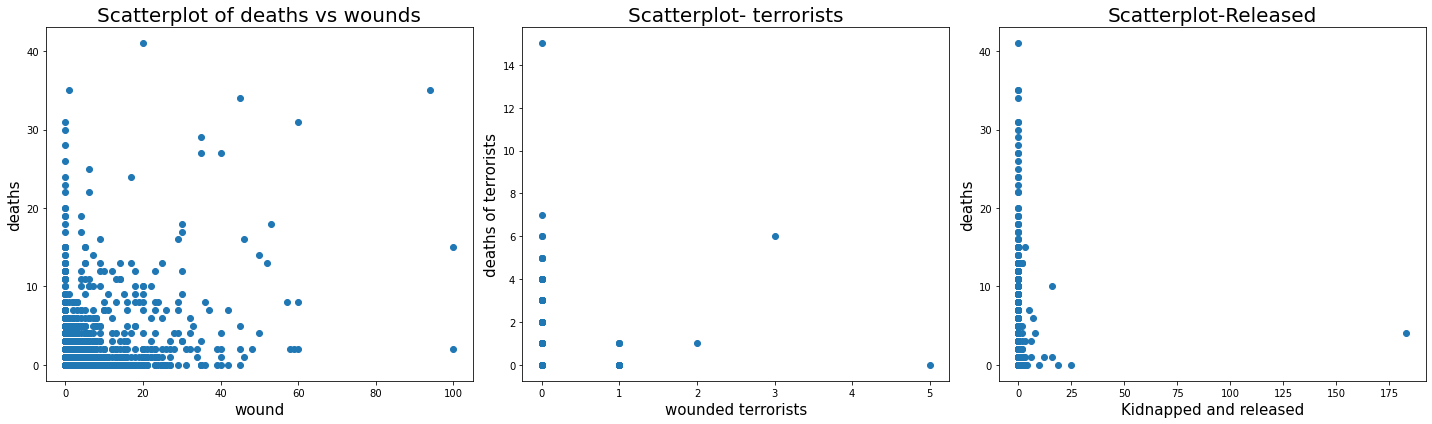

In [78]:
f,ax=plt.subplots(1,3,figsize=(20,6))
ax[0].scatter(x=cities.nwound,y=cities.nkill)
ax[0].set_ylabel("deaths",fontdict={'fontsize': 15})
ax[0].set_xlabel("wound",fontdict={'fontsize': 15})
ax[0].set_title('Scatterplot of deaths vs wounds',fontdict={'fontsize': 20})
ax[1].scatter(x=cities.nwoundte,y=cities.nkillter)
ax[1].set_ylabel("deaths of terrorists",fontdict={'fontsize': 15})
ax[1].set_xlabel("wounded terrorists",fontdict={'fontsize': 15})


ax[1].set_title('Scatterplot- terrorists',fontdict={'fontsize': 20})

ax[2].set_title('Scatterplot of deaths of persons vs wounds of terrorists',fontdict={'fontsize': 20})
ax[2].scatter(x=cities.nreleased,y=cities.nkill)
ax[2].set_ylabel("deaths",fontdict={'fontsize': 15})
ax[2].set_xlabel("Kidnapped and released",fontdict={'fontsize': 15})
ax[2].set_title('Scatterplot-Released',fontdict={'fontsize': 20})

plt.tight_layout()

{'whiskers': [<matplotlib.lines.Line2D at 0x17184fa97c0>,
 'caps': [<matplotlib.lines.Line2D at 0x17184fa9e80>,
 'boxes': [<matplotlib.lines.Line2D at 0x17184fa9460>],
 'medians': [<matplotlib.lines.Line2D at 0x17184fb4580>],
 'fliers': [<matplotlib.lines.Line2D at 0x17184fb48e0>],
 'means': []}

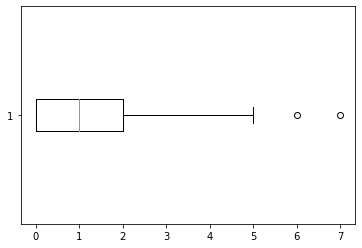

In [79]:
d=cities.groupby('year')['suicide'].sum()
plt.boxplot(d,vert=False)

# CONCLUSION

Some key insights from our analysis include:-

1. Global terrorism expanded rapidly post (2001), and the center of terrorism has shifted from the West to the Middle East and in South Asia, it has sharply increased.
The motives of terrorists are political, and emanate from groups who desire political or religious change or revenge, yet lack the political power to enforce the change through any means other than violence.
The number of attacks reached its peak in the year 2014.



2. The number of killings, and wounded has increased significantly after 2010. Suicidal attacks have also increased which shows us the increase in radicalization.
Mean of the attacks,injuries and deaths over all the years is 4106,11627,9311. 
Throughout, we can see that number of injuries and deaths have been quite high. Whenever, any global terrorist activity occurs, number of deaths and injuries are huge.



3. Most of the time explosive has been used as weapons and attacks type was bombing/explosion.



4. The top four countries facing terrorism are Iraq, Afghanistan, Pakistan, and India and the terror groups are  Taliban, ISIL, FARC, Maoists, etc.



5. Most of the terrorist activities have occured due to political, economic, religious, intimidate, or convey some other message to a larger audience, etc. which comprises of all three criterias mentioned here.



6. Private citizens were not always the target of terrorists worldwide — in somec cases, police, government, military targets and infrastructure were also vulnerable.



7. In India major terrorist activities have occurred in the States of Jammu and Kashmir, Chhattisgarh, Assam, Manipur, and Jharkhand.



8. For Jammu and Kashmir we can see firearms were used more than explosives as compared to other 5 states where explosives were mostly used.



9. The highly affected cities in the state of Jammu and Kashmir are Srinagar, Sopore, Anantnag, Jammu and Tral.